In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_set=pd.read_csv("collegePlace.csv")
data_set

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [8]:
def lower(text):
    text=text.lower()
    return text

In [9]:
data_set["Gender"]=data_set["Gender"].apply(lower)

In [11]:
data_set["Stream"]=data_set["Stream"].apply(lower)

In [12]:
data_set

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,male,electronics and communication,1,8,1,1,1
1,21,female,computer science,0,7,1,1,1
2,22,female,information technology,1,6,0,0,1
3,21,male,information technology,0,8,0,1,1
4,22,male,mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,male,information technology,0,7,0,0,0
2962,23,male,mechanical,1,7,1,0,0
2963,22,male,information technology,1,7,0,0,0
2964,22,male,computer science,1,7,0,0,0


In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder
stream_encoder=LabelEncoder()
data_set["Stream"]=stream_encoder.fit_transform(data_set["Stream"].values)
gender_encoder=LabelEncoder()
data_set["Gender"]=gender_encoder.fit_transform(data_set["Gender"].values)
data_set

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,1,4,0,7,0,0,0
2962,23,1,5,1,7,1,0,0
2963,22,1,4,1,7,0,0,0
2964,22,1,1,1,7,0,0,0


In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2966 non-null   int64
 1   Gender             2966 non-null   int32
 2   Stream             2966 non-null   int32
 3   Internships        2966 non-null   int64
 4   CGPA               2966 non-null   int64
 5   Hostel             2966 non-null   int64
 6   HistoryOfBacklogs  2966 non-null   int64
 7   PlacedOrNot        2966 non-null   int64
dtypes: int32(2), int64(6)
memory usage: 162.3 KB


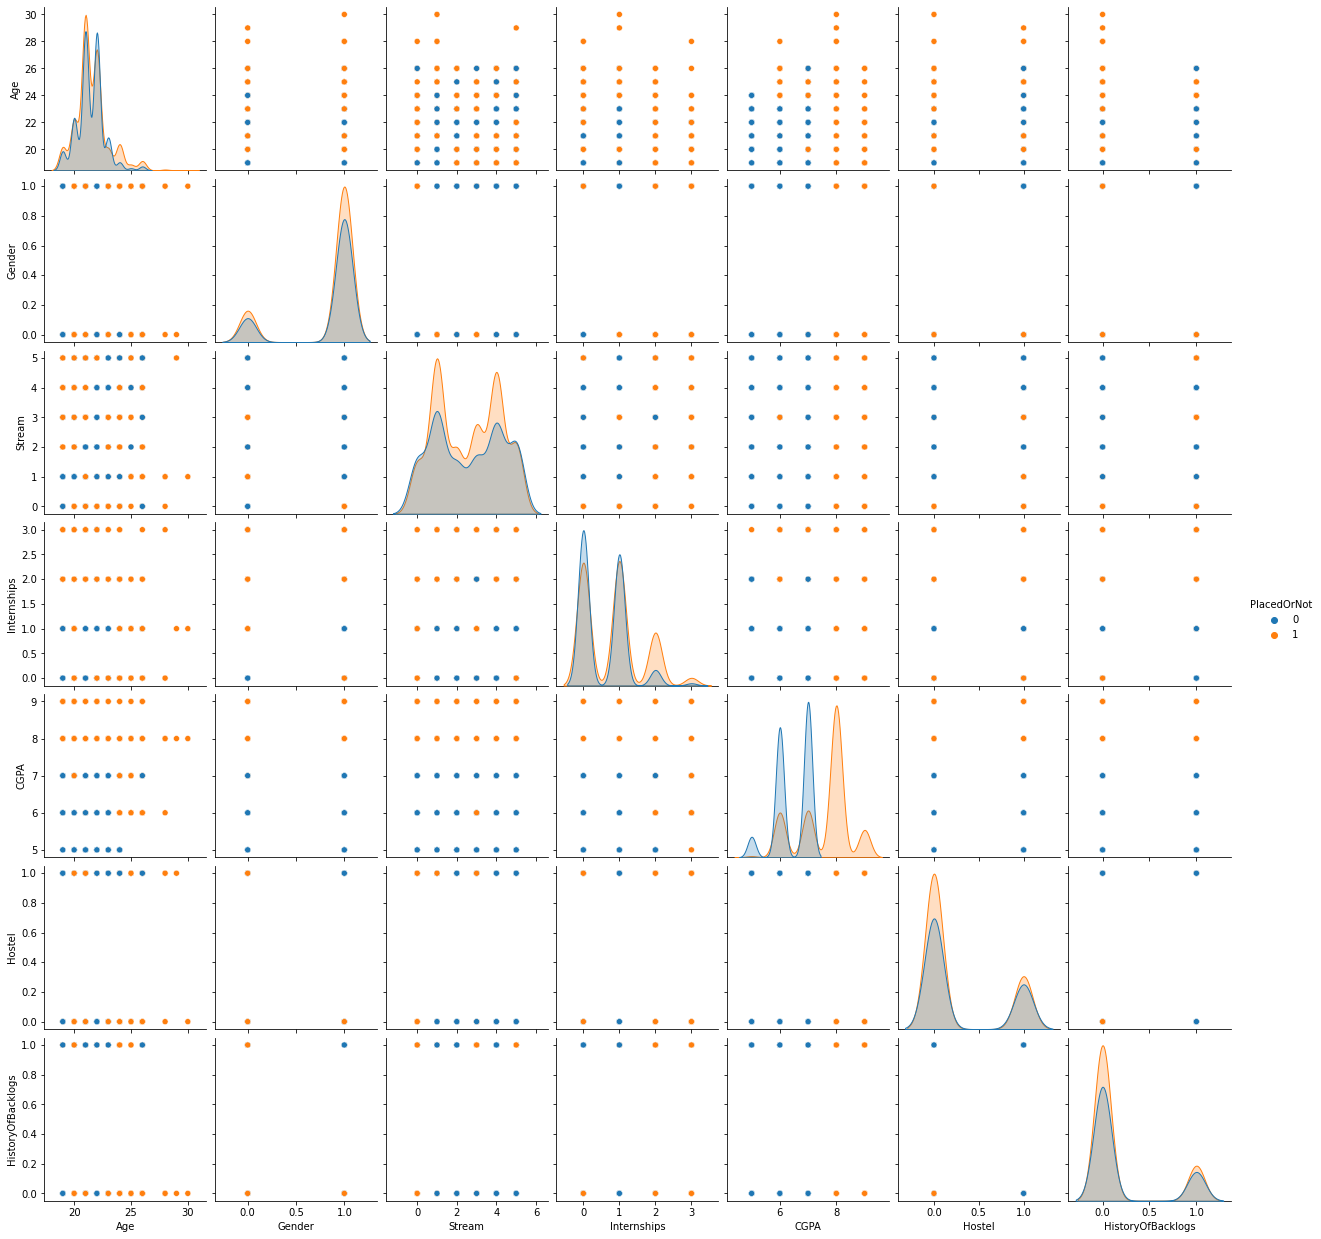

In [6]:
sns.pairplot(data_set,hue="PlacedOrNot")
plt.show()

In [13]:
x=data_set.iloc[:,:-1].values
y=data_set.iloc[:,-1].values

In [14]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(x_train,y_train)

LogisticRegression()

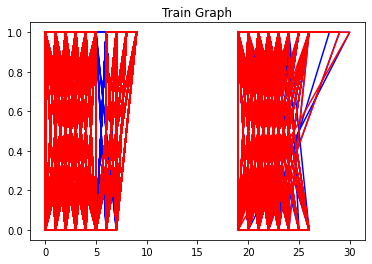

In [19]:
plt.plot(sc_x.inverse_transform(x_train),y_train,"b")
plt.plot(sc_x.inverse_transform(x_train),log_classifier.predict(x_train),"r")
plt.title("Train Graph")
plt.show()

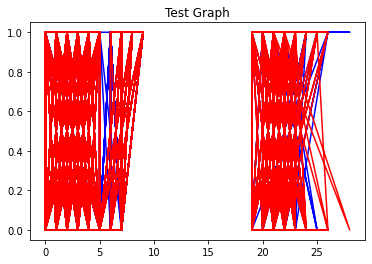

In [20]:
plt.plot(sc_x.inverse_transform(x_test),y_test,"b")
plt.plot(sc_x.inverse_transform(x_test),log_classifier.predict(x_test),"r")
plt.title("Test Graph")
plt.show()

In [21]:
print("Train Score: ",log_classifier.score(x_train,y_train))
print("Test Score: ",log_classifier.score(x_test,y_test))

Train Score:  0.78035413153457
Test Score:  0.7222222222222222


In [22]:
y_train_pred=log_classifier.predict(x_train)
y_test_pred=log_classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
print("Train Confusion Matrix:\n",confusion_matrix(y_train,y_train_pred))
print("Test Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))

Train Confusion Matrix:
 [[ 781  266]
 [ 255 1070]]
Test Confusion Matrix:
 [[194  86]
 [ 79 235]]


## SVC(Kernel)

In [23]:
from sklearn.svm import SVC
svc_classifier=SVC(kernel="rbf",random_state=42)
svc_classifier.fit(x_train,y_train)

SVC(random_state=42)

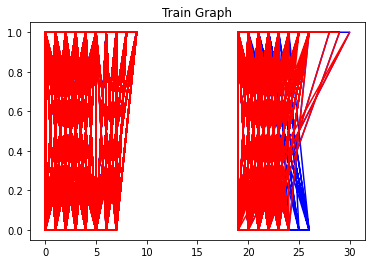

In [24]:
plt.plot(sc_x.inverse_transform(x_train),y_train,"b")
plt.plot(sc_x.inverse_transform(x_train),svc_classifier.predict(x_train),"r")
plt.title("Train Graph")
plt.show()

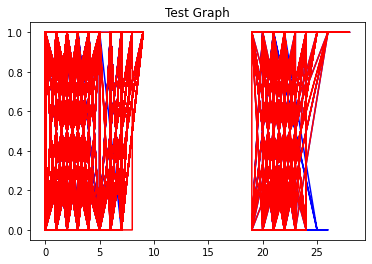

In [25]:
plt.plot(sc_x.inverse_transform(x_test),y_test,"b")
plt.plot(sc_x.inverse_transform(x_test),svc_classifier.predict(x_test),"r")
plt.title("Test Graph")
plt.show()

In [26]:
print("Train Score: ",svc_classifier.score(x_train,y_train))
print("Test Score: ",svc_classifier.score(x_test,y_test))

Train Score:  0.8663575042158516
Test Score:  0.8703703703703703


In [27]:
y_train_pred=svc_classifier.predict(x_train)
y_test_pred=svc_classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
print("Train Confusion Matrix:\n",confusion_matrix(y_train,y_train_pred))
print("Test Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))

Train Confusion Matrix:
 [[ 981   66]
 [ 251 1074]]
Test Confusion Matrix:
 [[266  14]
 [ 63 251]]


## KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(metric="minkowski",p=2)
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

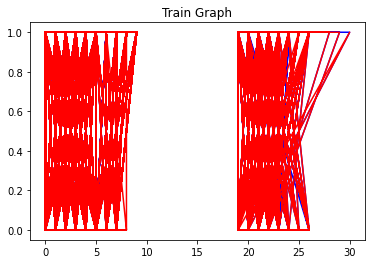

In [29]:
plt.plot(sc_x.inverse_transform(x_train),y_train,"b")
plt.plot(sc_x.inverse_transform(x_train),knn_classifier.predict(x_train),"r")
plt.title("Train Graph")
plt.show()

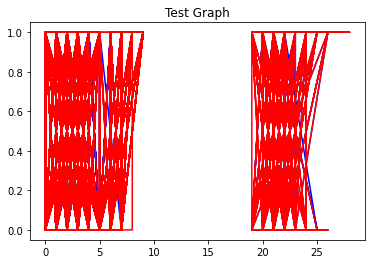

In [30]:
plt.plot(sc_x.inverse_transform(x_test),y_test,"b")
plt.plot(sc_x.inverse_transform(x_test),knn_classifier.predict(x_test),"r")
plt.title("Test Graph")
plt.show()

In [31]:
print("Train Score: ",knn_classifier.score(x_train,y_train))
print("Test Score: ",knn_classifier.score(x_test,y_test))

Train Score:  0.8870151770657673
Test Score:  0.8383838383838383


In [32]:
y_train_pred=knn_classifier.predict(x_train)
y_test_pred=knn_classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
print("Train Confusion Matrix:\n",confusion_matrix(y_train,y_train_pred))
print("Test Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))

Train Confusion Matrix:
 [[ 964   83]
 [ 185 1140]]
Test Confusion Matrix:
 [[241  39]
 [ 57 257]]


## Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
bayes_classifier=GaussianNB()
bayes_classifier.fit(x_train,y_train)

GaussianNB()

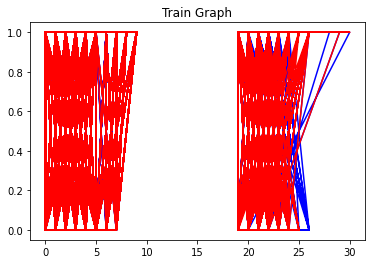

In [34]:
plt.plot(sc_x.inverse_transform(x_train),y_train,"b")
plt.plot(sc_x.inverse_transform(x_train),bayes_classifier.predict(x_train),"r")
plt.title("Train Graph")
plt.show()

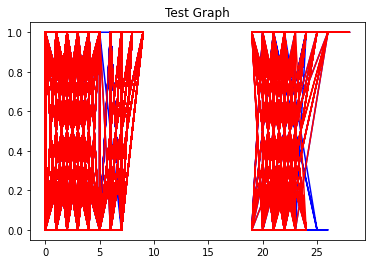

In [35]:
plt.plot(sc_x.inverse_transform(x_test),y_test,"b")
plt.plot(sc_x.inverse_transform(x_test),bayes_classifier.predict(x_test),"r")
plt.title("Test Graph")
plt.show()

In [36]:
print("Train Score: ",bayes_classifier.score(x_train,y_train))
print("Test Score: ",bayes_classifier.score(x_test,y_test))

Train Score:  0.8195615514333895
Test Score:  0.7861952861952862


In [37]:
y_train_pred=bayes_classifier.predict(x_train)
y_test_pred=bayes_classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
print("Train Confusion Matrix:\n",confusion_matrix(y_train,y_train_pred))
print("Test Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))

Train Confusion Matrix:
 [[ 877  170]
 [ 258 1067]]
Test Confusion Matrix:
 [[231  49]
 [ 78 236]]


## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier=DecisionTreeClassifier(criterion="entropy",random_state=42)
tree_classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

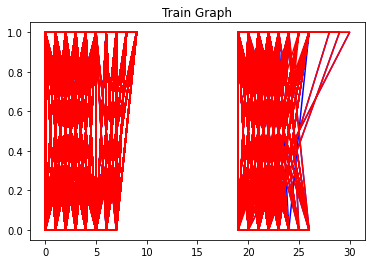

In [40]:
plt.plot(sc_x.inverse_transform(x_train),y_train,"b")
plt.plot(sc_x.inverse_transform(x_train),tree_classifier.predict(x_train),"r")
plt.title("Train Graph")
plt.show()

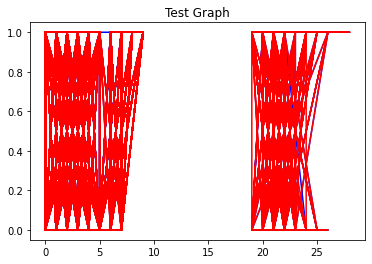

In [41]:
plt.plot(sc_x.inverse_transform(x_test),y_test,"b")
plt.plot(sc_x.inverse_transform(x_test),tree_classifier.predict(x_test),"r")
plt.title("Test Graph")
plt.show()

In [42]:
print("Train Score: ",tree_classifier.score(x_train,y_train))
print("Test Score: ",tree_classifier.score(x_test,y_test))

Train Score:  0.9236930860033726
Test Score:  0.8804713804713805


In [43]:
y_train_pred=tree_classifier.predict(x_train)
y_test_pred=tree_classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
print("Train Confusion Matrix:\n",confusion_matrix(y_train,y_train_pred))
print("Test Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))

Train Confusion Matrix:
 [[1018   29]
 [ 152 1173]]
Test Confusion Matrix:
 [[261  19]
 [ 52 262]]


## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
random_classifier=RandomForestClassifier(criterion="entropy",random_state=42)
random_classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

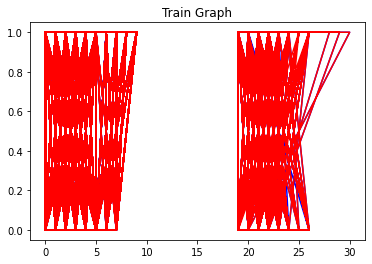

In [45]:
plt.plot(sc_x.inverse_transform(x_train),y_train,"b")
plt.plot(sc_x.inverse_transform(x_train),random_classifier.predict(x_train),"r")
plt.title("Train Graph")
plt.show()

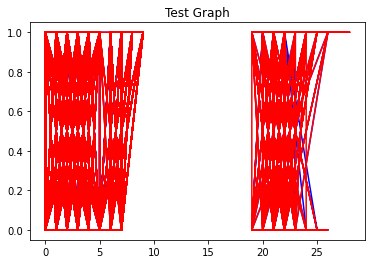

In [46]:
plt.plot(sc_x.inverse_transform(x_test),y_test,"b")
plt.plot(sc_x.inverse_transform(x_test),random_classifier.predict(x_test),"r")
plt.title("Test Graph")
plt.show()

In [47]:
print("Train Score: ",random_classifier.score(x_train,y_train))
print("Test Score: ",random_classifier.score(x_test,y_test))

Train Score:  0.9236930860033726
Test Score:  0.8737373737373737


In [50]:
y_train_pred=random_classifier.predict(x_train)
y_test_pred=random_classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
print("Train Confusion Matrix:\n",confusion_matrix(y_train,y_train_pred))
print("Test Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))

Train Confusion Matrix:
 [[1009   38]
 [ 143 1182]]
Test Confusion Matrix:
 [[255  25]
 [ 50 264]]


In [52]:
data=data_set[["Age","Gender"]].values
data

array([[22,  1],
       [21,  0],
       [22,  0],
       ...,
       [22,  1],
       [22,  1],
       [23,  1]], dtype=int64)